# San Francisco Crime
### Considerations
TODO

### Imports

In [1]:
import pandas as pd
import matplotlib
import seaborn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
seaborn.set()

### Map
Before we dive into the data, we look at the map of San Francisco

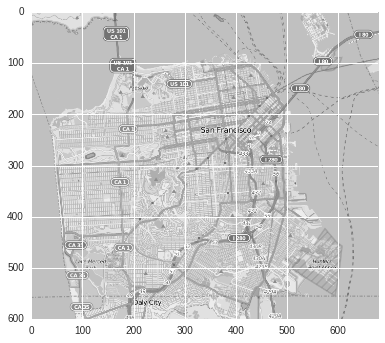

In [19]:
mapdata = np.loadtxt("../data/sf_map_copyright_openstreetmap_contributors.txt")
plt.imshow(mapdata, cmap = plt.get_cmap('gray'))

## Data
### Import Data

In [2]:
data_train = pd.read_csv('../data/train.csv', sep = ',')

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

### Rough Data Analysis
TODO

In [12]:
data_train.describe(percentiles=[]).transpose()

count        mean       std         min         50%    max
X  878049.0 -122.422616  0.030354 -122.513642 -122.416420 -120.5
Y  878049.0   37.771020  0.456893   37.707879   37.775421   90.0

TODO

In [13]:
data_train.describe(percentiles=[], include=['O']).transpose()

count  unique                           top    freq
Dates       878049  389257           2011-01-01 00:01:00     185
Category    878049      39                 LARCENY/THEFT  174900
Descript    878049     879  GRAND THEFT FROM LOCKED AUTO   60022
DayOfWeek   878049       7                        Friday  133734
PdDistrict  878049      10                      SOUTHERN  157182
Resolution  878049      17                          NONE  526790
Address     878049   23228        800 Block of BRYANT ST   26533

### Target Variable
TODO

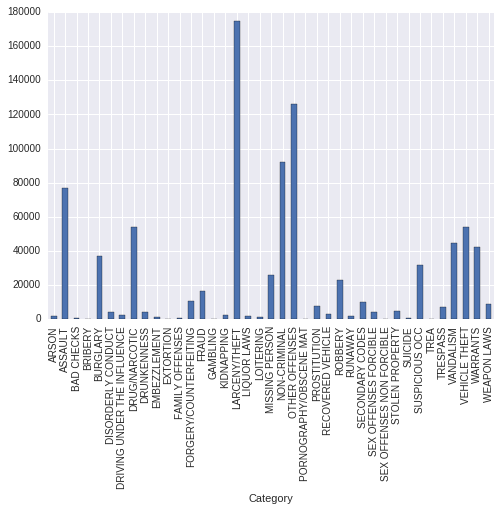

In [20]:
d = data_train.groupby('Category').size()
d.plot(kind='bar') #TODO: better visualization

### Test Data
The training data and test data rotate every week. Besides the target variable "Category" also "Descript" and "Resolution" are missing from the the test set.

In [35]:
data_test = pd.read_csv('../data/test.csv', sep = ',')

### Data Anmalies
#### LongLat
First convert all X/Y Values to numeric to be able to compare them.

In [36]:
d_train_x = pd.to_numeric(data_train['X'])
d_train_y = pd.to_numeric(data_train['Y'])
d_test_x = pd.to_numeric(data_test['X'])
d_test_y = pd.to_numeric(data_test['Y'])

In [39]:
#data_train.loc[d_train_x > -122.52469 and d_train_x < -122.33663]

KeyError: True

In [ ]:
data_train.loc[d_train_y < -122.52469]

In [ ]:
data_test.loc[d_train_x < -122.52469]

In [ ]:
data_test.loc[d_train_x < -122.52469]

### Standart Features

#### Dates
TODO

In [ ]:
def feature_dates(data):
    data['Dates'] = pd.to_datetime(data['Dates'], format='%Y-%m-%d %H:%M:%S') #split up in date and time?
    return np.asarray(data['Dates']), ['Dates']

#### DayOfWeek
TODO

In [ ]:
def feature_day_of_week(data):
    data['DayOfWeek'] = pd.to_datetime(data['Dates'], format='%Y-%m-%d).dt.weekday() #0 = Monday, 6 = Sunday
    return np.asarray(data['DayOfWeek']), ['DayOfWeek']

#### PdDistrict
TODO

In [7]:
data_train['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [ ]:
def feature_pd_district(data):
    return np.asarray(data['PdDistrict'])

#### Address
TODO

In [ ]:
def feature_address(data):
    return np.asarray(data['Address'])
#unnötig da wir LatLong haben?

#### X (Longitude)
TODO

In [ ]:
def feature_longitude(data):


#### Y (Latitude)
TODO

### Derived Features
#### TODO
TODO

### Left out Features
TODO

#### Descript
TODO

In [ ]:
def feature_descript(data):


#### Resolution
The orderDate as is doesn't help with the classification task, but derived features might.

In [ ]:
def feature_resolution(data):


In [ ]:
def feature_article_id(data):
    data['articleID'] = pd.to_numeric(data['articleID'].str.replace('i', 0))
    return np.asarray(data['articleID']), ['articleID']

### Generate Feature Set

In [ ]:
import features.all_features as all_features

print("get train features")
train_x, names = getX(data_train)
train_y = getY(data_train)

print("get test features")
test_x, names_test = getX(data_test, test_set=True)
test_y = getY(data_test)

### Feature Selection

#### PCA

TODO

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
pca.fit(train_x)
pc = pca.explained_variance_

plt.bar(np.arange(pc.shape[0]), pca.explained_variance_ratio_)
plt.show()
print(pc)

#### Random Forest
TODO

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(n_estimators=1)


train = model.fit(train_x, train_y)
pred = model.predict(test_x)

# feature importance
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

#bar chart plot for feature importance
#because of the huge number of the features, legend of the bars are shown in the terminal
plt.figure(figsize=(30, 10))
plt.title("feature importance")
plt.bar(range(importance.shape[0]), importance, color="r", align="center")
plt.xlim([-1, importance.shape[0]])
plt.xticks(range(importance.shape[0]))
plt.show()

counter = 0
for i in range(indices.shape[0]):
        print(str(i) + " " + names[i] + " " + str(importance[i]))

## Get finish Feature Sets

In [ ]:
import features.all_features as all_features

def getY(data):
    return np.asarray(data['returnQuantity'])

def getX(data , test_set=False):

    feature_methodes = [  "feature_price", "feature_voucher_used",\
                          "feature_voucher_amount", "feature_quantity", "feature_deviceID",\
                          "feature_paymentMethod", "feature_frequent_buyer", "feature_basket_length", "feature_rrp" ]

    if test_set == False:
        feature_methodes = feature_methodes + ["train_features_ReturnRatio"]
    else:
        feature_methodes = feature_methodes + ["test_features_ReturnRatio"]

    feats = []
    names = []

    for m in feature_methodes:
        func = getattr(all_features, m)
        f, n = func(data)
        if f.ndim == 1:
            f = f.reshape([f.shape[0],1])
        feats.append(f)
        names.append(n)

    data_set = np.concatenate([f for f in feats], axis=1).astype(float)
    return data_set, sum(names, [])

In [ ]:
print("get train features")
train_x, names = getX(data_train)
train_y = getY(data_train)

print("get test features")
test_x, names_test = getX(data_test, test_set=True)
test_y = getY(data_test)

## Classification
For each tried Classifier we output the accuracy and the DMC metric. After that we select the one which has the best score (lower is better).

In [ ]:
def sfc_eval(pred, true):
    #TODO

### Logistic Regression
The logistic regression is a statistical approach to predict the class labels. It needs some assumptions like binomial distribution for the response variable. The Classificator trains for every label an separate regression model. The model with the highest likelihood gets the classification. This model provides a good result in our case.

In [ ]:
from Classifiers.LogisticRegression import classifier_lr

classifier_lr(train_x, train_y, test_x, test_y)

### Naive Bayes
This model is also a statistical approach. It trains a Naive bayes network and classifies the data with the aposteriori likelihood. Its a very fast benchmark classificator which provides in this case the poorest results

In [ ]:
from Classifiers.NaiveBayes import classifier_nb

classifier_nb(train_x, train_y, test_x, test_y)

### Random Forest
Random Forest is classificator which generates many decision trees with random samples. For every tree it try to maximize the information gain. It classifies according to a majority decision

In [ ]:
from Classifiers.RandomForest import classifier_rf

classifier_rf(train_x, train_y, test_x, test_y)

### Stochastic Gradient Descent with SVM
This Classifier trains for every level of the Output a separate svm (one against all) with the learning methods stochastic gradient descent. This learning methods updating the weight vector in direction with the steepest error reduction. It provides for this challenge the best results.
This method learns the fastest and has the best score. Because of this we choose this one to predict the returnQuantity.

In [ ]:
from Classifiers.SGD import classifier_sgd

classifier_sgd(train_x, train_y, test_x, test_y)

## Result

For our submission we use the best configuration based on the evaluation:

In [ ]:
from sklearn.linear_model import SGDClassifier

data_train = pd.read_csv('orders_train.txt', sep = ';')
data_test = pd.read_csv('orders_class.txt', sep = ';')

print("get train features")
train_x, names = getX(data_train)
train_y = getY(data_train)

print("get test features")
test_x, names_test = getX(data_test, test_set=True)

name = "SGDClassifier"

model = SGDClassifier()

print("Train",name,"Classifier")
train = model.fit(train_x, train_y)

pred = model.predict(test_x)

data_test['prediction'] = pred
data_test.to_csv('group2.txt', sep=';', index=False, columns=['orderID', 'articleID', 'colorCode', 'sizeCode', 'prediction'])